In [ ]:
# mount my Google Drive on the VM

from google.colab import drive
drive.mount('/gdrive')

import os
import pandas as pd

DIR_FINTECH_PROJECT = '/gdrive/MyDrive/Fintech/Fintech Project'
#DIR_FINTECH_PROJECT = '/gdrive/MyDrive/Fintech Project' # Alejandro
DIR_DATA = os.path.join(DIR_FINTECH_PROJECT, 'data')

Mounted at /gdrive


In [ ]:
Dataset_used = 'RedditNews.csv'
Numdays = 2 #Number of stock days used to look at the impact of a news
weight_p = 0.33 #Weight of positive stock variation when computing weight of a word
weight_n = 0.45 #Weight of negative stock variation when computing weight of a word

#part 1: compute weights

Dataset from: https://www.kaggle.com/datasets/aaron7sun/stocknews/?select=RedditNews.csv
-> can be replaced with finance specific news

In [ ]:
df = pd.read_csv(os.path.join(DIR_DATA, Dataset_used))

In [ ]:
# Decode byte strings to regular strings
df['News'] = df['News'].apply(lambda x: x[2:-1] if x.startswith("b'") else x)
df['News'] = df['News'].apply(lambda x: x[2:-1] if x.startswith('b"') else x)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# Identify weekend dates and iterate through them
for index, row in df[df['Date'].dt.dayofweek >= 5].iterrows():
    next_monday = row['Date'] + pd.DateOffset(days=(7 - row['Date'].dayofweek))
    next_monday_row = pd.DataFrame({'Date': [next_monday], 'News': [row['News']]})
    df = pd.concat([df, next_monday_row], ignore_index=True)

# Drop rows with weekend dates
df = df[df['Date'].dt.dayofweek < 5]

# Sort the DataFrame by 'Date'
df.sort_values('Date', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Group headlines by date and concatenate them into a string separated by points
df = df.groupby('Date')['News'].apply(lambda x: ' . '.join(x)).reset_index()

df.head(5)

,Date,News
0,2008-06-09,"Marriage, they said, was reduced to the status..."
1,2008-06-10,Saddam tribe leader murdered in Iraq . Petitio...
2,2008-06-11,2 US Lawmakers say computers compromised by Ch...
3,2008-06-12,"Huh, the American establishment has a LONG his..."
4,2008-06-13,Israeli settlers throw stones at Palestinian b...


In [ ]:
import yfinance as yf
sp500 = yf.Ticker("^GSPC")
# get historical market data for s&p500 index here date can be adapted to dataset
hist = sp500.history(start="2008-06-07",end="2016-07-02")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-06-09 00:00:00-04:00,1360.829956,1370.630005,1350.619995,1361.760010,4404570000,0.0,0.0
2008-06-10 00:00:00-04:00,1358.979980,1366.839966,1351.560059,1358.439941,4635070000,0.0,0.0
2008-06-11 00:00:00-04:00,1357.089966,1357.089966,1335.469971,1335.489990,4779980000,0.0,0.0
2008-06-12 00:00:00-04:00,1335.780029,1353.030029,1331.290039,1339.869995,4734240000,0.0,0.0
2008-06-13 00:00:00-04:00,1341.810059,1360.030029,1341.709961,1360.030029,4080420000,0.0,0.0
...,...,...,...,...,...,...,...
2016-06-27 00:00:00-04:00,2031.449951,2031.449951,1991.680054,2000.540039,5431220000,0.0,0.0
2016-06-28 00:00:00-04:00,2006.670044,2036.089966,2006.670044,2036.089966,4385810000,0.0,0.0
2016-06-29 00:00:00-04:00,2042.689941,2073.129883,2042.689941,2070.770020,4241740000,0.0,0.0


In [ ]:
hist['stock variation']=((hist['Close'] - hist['Open']) / hist['Open']) * 100

Test pour un plus gros impact des valeurs negatives

In [ ]:
def weight_values(x):
    return x*weight_p if (x >= 0) else x * weight_n

# Apply the function to the 'stock variation' column
hist['stock variation'] = hist['stock variation'].apply(weight_values)

In [ ]:
hist = hist['stock variation']
hist

Date
2023-10-25 00:00:00-04:00   -0.485360
2023-10-26 00:00:00-04:00   -0.417676
2023-10-27 00:00:00-04:00   -0.385319
2023-10-30 00:00:00-04:00    0.218675
2023-10-31 00:00:00-04:00    0.177761
2023-11-01 00:00:00-04:00    0.287405
2023-11-02 00:00:00-04:00    0.382863
2023-11-03 00:00:00-04:00    0.183568
2023-11-06 00:00:00-05:00    0.012930
2023-11-07 00:00:00-05:00    0.091981
2023-11-08 00:00:00-05:00   -0.016323
2023-11-09 00:00:00-05:00   -0.451496
2023-11-10 00:00:00-05:00    0.386325
2023-11-13 00:00:00-05:00    0.036617
2023-11-14 00:00:00-05:00    0.271832
2023-11-15 00:00:00-05:00   -0.024171
2023-11-16 00:00:00-05:00    0.081894
2023-11-17 00:00:00-05:00    0.032712
2023-11-20 00:00:00-05:00    0.260973
2023-11-21 00:00:00-05:00   -0.005751
2023-11-22 00:00:00-05:00    0.025948
2023-11-24 00:00:00-05:00    0.009999
Name: stock variation, dtype: float64

In [ ]:
hist.index = hist.index.tz_localize(None)

In [ ]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(hist, df, on='Date', how='left')
merged_data

,Date,stock variation,News,value,cumulative_sum
0,2023-10-25,-0.485360,"Stock Market News, Oct. 25, 2023: Nasdaq Close...",0.874534,0.874534
1,2023-10-26,-0.417676,Nasdaq 100 Declines 1% as Tech Giants Get Hit:...,-75.779436,-74.904901
2,2023-10-27,-0.385319,Stock Market Today: S&P 500 on Track to Enter ...,-35.691631,-110.596532
3,2023-10-30,0.218675,"Stock Market News, Oct. 30, 2023: Dow Rises 50...",5.167677,-105.428855
4,2023-10-31,0.177761,Stocks edge higher in countdown to Fed decisio...,40.720456,-64.708398
5,2023-11-01,0.287405,"Stocks Up, Bond Yields Down With Eyes on Powel...",51.174979,-13.533420
6,2023-11-02,0.382863,S&P 500 Has Best Day Since April in Run-Up to ...,66.336110,52.802690
7,2023-11-03,0.183568,Dow jumps more than 200 points after soft jobs...,40.410203,93.212894
8,2023-11-06,0.012930,Deadly earthquakes in Nepal since 2015 . Bigge...,32.845276,126.058169
9,2023-11-07,0.091981,"S&P 500 rises for a seventh straight day, on p...",10.187225,136.245394


Impact is computed either from one day, two (day after the news is included), or three (day before the news is included). This is to try to catch as much as possible the area of effect.

In [ ]:
match Numdays:
  case 1:
    merged_data['News_Impact'] = merged_data['stock variation']
  case 2:
    # Compute the mean of the day and the day after's stock variations
    merged_data['News_Impact'] = merged_data['stock variation'] + merged_data['stock variation'].shift(1)
  case default:
    # Compute the mean of the day before, the day, and the day after's stock variations
    merged_data['News_Impact'] = merged_data['stock variation'].shift(-1) + merged_data['stock variation'] + merged_data['stock variation'].shift(1)

# Round the result to the nearest unit
# merged_data['News_Impact'] = merged_data['News_Impact'].round()

In [ ]:
# Drop rows with NaN values in the 'News_Impact' column
merged_data.dropna(subset=['News_Impact'], inplace=True)
merged_data

,Date,stock variation,News,value,cumulative_sum,News_Impact
1,2023-10-26,-0.417676,Nasdaq 100 Declines 1% as Tech Giants Get Hit:...,-75.779436,-74.904901,-0.903036
2,2023-10-27,-0.385319,Stock Market Today: S&P 500 on Track to Enter ...,-35.691631,-110.596532,-0.802995
3,2023-10-30,0.218675,"Stock Market News, Oct. 30, 2023: Dow Rises 50...",5.167677,-105.428855,-0.166644
4,2023-10-31,0.177761,Stocks edge higher in countdown to Fed decisio...,40.720456,-64.708398,0.396436
5,2023-11-01,0.287405,"Stocks Up, Bond Yields Down With Eyes on Powel...",51.174979,-13.533420,0.465166
6,2023-11-02,0.382863,S&P 500 Has Best Day Since April in Run-Up to ...,66.336110,52.802690,0.670268
7,2023-11-03,0.183568,Dow jumps more than 200 points after soft jobs...,40.410203,93.212894,0.566431
8,2023-11-06,0.012930,Deadly earthquakes in Nepal since 2015 . Bigge...,32.845276,126.058169,0.196498
9,2023-11-07,0.091981,"S&P 500 rises for a seventh straight day, on p...",10.187225,136.245394,0.104910
10,2023-11-08,-0.016323,Stock Rally Shows ‘Buyer Fatigue’ as Bonds Cli...,-19.809237,116.436157,0.075658


In [ ]:
import string
# Function to extract words and associate them with the previous 'News_Impact' value
def extract_words(row):
    words = row['News'].translate(str.maketrans("", "", string.punctuation)).split()
    news_impact = row['News_Impact']
    return pd.DataFrame({'News_Impact': [news_impact] * len(words), 'Word': words})

# Apply the function to each row and concatenate the results
result_dataset = pd.concat(merged_data.apply(extract_words, axis=1).to_list(), ignore_index=True)

# Display the resulting dataset
print(result_dataset)

       News_Impact      Word
0        -0.903036    Nasdaq
1        -0.903036       100
2        -0.903036  Declines
3        -0.903036         1
4        -0.903036        as
...            ...       ...
11276     0.035947     bonds
11277     0.035947  continue
11278     0.035947        to
11279     0.035947      sell
11280     0.035947       off

[11281 rows x 2 columns]


In [ ]:
# Replace 'US' with 'USA' in the 'Word' column (to not have issue with the word "us")
result_dataset['Word'] = result_dataset['Word'].replace('US', 'USA')
result_dataset['Word'] = result_dataset['Word'].str.lower()

In [ ]:
grouped_dataset = result_dataset.groupby('Word').agg({'News_Impact': 'sum', 'Word': 'count'}).rename(columns={'News_Impact': 'Sum_News_Impact', 'Word': 'Occurrences'}).reset_index()
grouped_dataset['Relative_impact']=grouped_dataset['Sum_News_Impact']/grouped_dataset['Occurrences']
# Display the resulting grouped dataset
print(grouped_dataset)

             Word  Sum_News_Impact  Occurrences  Relative_impact
0               1        -2.343839           13        -0.180295
1              10         0.249810           10         0.024981
2             100        -2.229272           17        -0.131134
3         10month        -0.166644            1        -0.166644
4          10year         0.171513            3         0.057171
...           ...              ...          ...              ...
2055  ‘supercore’         0.308449            1         0.308449
2056         ‘too         0.040394            2         0.020197
2057        ‘true         0.510443            2         0.255221
2058      ‘yawns’         0.396436            1         0.396436
2059          ’21        -0.802995            1        -0.802995

[2060 rows x 4 columns]


In [ ]:
# Sort the grouped dataset by 'Occurrences' in descending order
sorted_dataset = grouped_dataset.sort_values(by='Relative_impact', ascending=False)

# Display the sorted dataset
print(sorted_dataset)

            Word  Sum_News_Impact  Occurrences  Relative_impact
366       ciaran         0.670268            1         0.670268
1292      peaked         0.670268            1         0.670268
740      fortune         0.670268            1         0.670268
128      already         1.340536            2         0.670268
1831      treaty         2.010805            3         0.670268
...          ...              ...          ...              ...
430         cost        -1.806071            2        -0.903036
958   invisalign        -0.903036            1        -0.903036
414    consumers        -0.903036            1        -0.903036
1080        lows        -0.903036            1        -0.903036
1368     pulling        -0.903036            1        -0.903036

[2060 rows x 4 columns]


In [ ]:
from itertools import chain
english_stops = pd.read_csv(os.path.join(DIR_DATA, 'englishstopwords.csv'), index_col = False).values.tolist()
english_stops = list(chain(*english_stops))
#Ensuring all data to be in a list

our_stops = ['i', 'http', 'yes', 'amp','us']
#Adding our words to not be counted


english_stops += our_stops
#Adding our list to a single big list


In [ ]:
no_stops = [t for t in sorted_dataset if t not in english_stops] # Remove all stop words
# Filter out rows containing stop words and non-alphabetic words
filtered_dataset = sorted_dataset[~(sorted_dataset['Word'].isin(english_stops) | ~sorted_dataset['Word'].str.isalpha())]

result_dataset['Word'] = result_dataset['Word'].replace('usa', 'us')
print(filtered_dataset)

            Word  Sum_News_Impact  Occurrences  Relative_impact
366       ciaran         0.670268            1         0.670268
1292      peaked         0.670268            1         0.670268
740      fortune         0.670268            1         0.670268
128      already         1.340536            2         0.670268
1831      treaty         2.010805            3         0.670268
...          ...              ...          ...              ...
430         cost        -1.806071            2        -0.903036
958   invisalign        -0.903036            1        -0.903036
414    consumers        -0.903036            1        -0.903036
1080        lows        -0.903036            1        -0.903036
1368     pulling        -0.903036            1        -0.903036

[1766 rows x 4 columns]


In [ ]:
filtered_dataset.to_csv(os.path.join(DIR_DATA, 'Words_StockImpact.csv'), index=False)

#part 2: try on our dataset

In [ ]:
df = pd.read_csv(os.path.join(DIR_DATA, 'headlines.csv'))
words_df = pd.read_csv(os.path.join(DIR_DATA, 'Words_StockImpact.csv'))

In [ ]:
df = df.rename(columns={'Time': 'Date'})
df = df.rename(columns={'Headlines': 'News'})
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'])
# Identify weekend dates and iterate through them
for index, row in df[df['Date'].dt.dayofweek >= 5].iterrows():
    next_monday = row['Date'] + pd.DateOffset(days=(7 - row['Date'].dayofweek))
    next_monday_row = pd.DataFrame({'Date': [next_monday], 'News': [row['News']]})
    df = pd.concat([df, next_monday_row], ignore_index=True)

# Drop rows with weekend dates
df = df[df['Date'].dt.dayofweek < 5]

# Sort the DataFrame by 'Date'
df.sort_values('Date', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Group headlines by date and concatenate them into a string separated by points
df = df.groupby('Date')['News'].apply(lambda x: ' . '.join(x)).reset_index()

df.head(5)

,Date,News
0,2023-10-25,"Stock Market News, Oct. 25, 2023: Nasdaq Close..."
1,2023-10-26,Nasdaq 100 Declines 1% as Tech Giants Get Hit:...
2,2023-10-27,Stock Market Today: S&P 500 on Track to Enter ...
3,2023-10-30,"Stock Market News, Oct. 30, 2023: Dow Rises 50..."
4,2023-10-31,Stocks edge higher in countdown to Fed decisio...


In [ ]:
# Function to calculate the sum of values associated with words in the 'news' column
def calculate_sum(row):
    # Split the 'news' column into words
    words = row['News'].split()

    # Convert words to lowercase for case-insensitive matching
    words_lower = [word.lower() for word in words]

    # Filter 'Words' dataset based on the words in the row
    filtered_words = words_df[words_df['Word'].isin(words_lower)]

    # Calculate the sum of 'Value' for the filtered words
    value_sum = filtered_words['Relative_impact'].sum()

    return value_sum

# Apply the function to each row and add a 'value' column to the dataset
df['value'] = df.apply(calculate_sum, axis=1)

print(df)

         Date                                               News      value
0  2023-10-25  Stock Market News, Oct. 25, 2023: Nasdaq Close...  -1.067471
1  2023-10-26  Nasdaq 100 Declines 1% as Tech Giants Get Hit:... -57.502045
2  2023-10-27  Stock Market Today: S&P 500 on Track to Enter ... -54.161630
3  2023-10-30  Stock Market News, Oct. 30, 2023: Dow Rises 50... -10.361527
4  2023-10-31  Stocks edge higher in countdown to Fed decisio...  31.376739
5  2023-11-01  Stocks Up, Bond Yields Down With Eyes on Powel...  38.818364
6  2023-11-02  S&P 500 Has Best Day Since April in Run-Up to ...  66.282977
7  2023-11-03  Dow jumps more than 200 points after soft jobs...  49.767638
8  2023-11-06  Deadly earthquakes in Nepal since 2015 . Bigge...  28.658645
9  2023-11-07  S&P 500 rises for a seventh straight day, on p...  11.882865
10 2023-11-08  Stock Rally Shows ‘Buyer Fatigue’ as Bonds Cli...  16.185608
11 2023-11-09  China's consumer prices back in decline as rec... -18.073520
12 2023-11-1

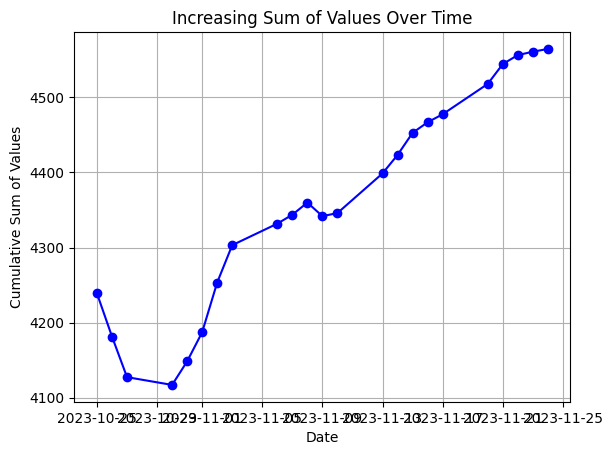

In [ ]:
import matplotlib.pyplot as plt

# Sort DataFrame by 'date' for proper plotting
df = df.sort_values(by='Date')

# Calculate the increasing sum of 'value' over time
df['cumulative_sum'] = df['value'].cumsum()

# Plot the increasing sum over time
plt.plot(df['Date'], df['cumulative_sum']+4240, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum of Values')
plt.title('Increasing Sum of Values Over Time')
plt.grid(True)
plt.show()

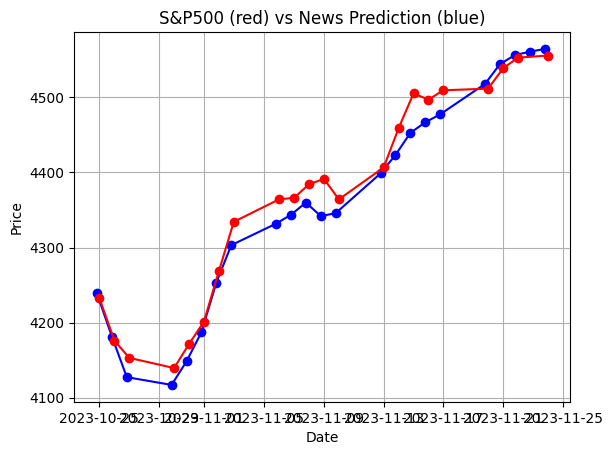

In [ ]:
sp500 = yf.Ticker("^GSPC")
# get historical market data for s&p500 index here date can be adapted to dataset
hist = sp500.history(start="2023-10-25",end="2023-11-25")
plt.plot(df['Date'], df['cumulative_sum']+4240, marker='o', linestyle='-', color='b')
plt.plot( hist['Open'], marker='o', linestyle='-', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P500 (red) vs News Prediction (blue)')
plt.grid(True)
plt.show()